In [8]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

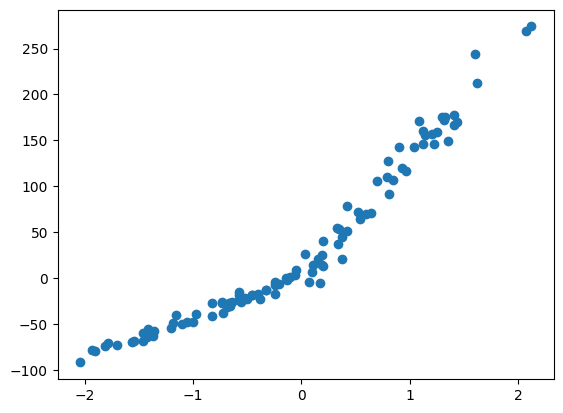

In [9]:
x , y = make_regression(n_samples = 100 , n_features = 1 , noise = 10)
y = y + abs(y / 2)

plt.scatter(x , y)

In [10]:
print(x.shape)
y = y.reshape(y.shape[0] , 1)
print(y.shape)

(100, 1)
(100, 1)


In [11]:
X = np.hstack((x , np.ones(x.shape)))
X = np.hstack((x**2 , X))
X[:10]

array([[ 0.660456  ,  0.81268444,  1.        ],
       [ 0.72358907,  0.85064039,  1.        ],
       [ 1.34261018, -1.15871057,  1.        ],
       [ 0.27718093,  0.52647975,  1.        ],
       [ 0.47596344, -0.68990103,  1.        ],
       [ 0.03626271,  0.19042772,  1.        ],
       [ 2.00496805, -1.41596894,  1.        ],
       [ 1.41498247, -1.18953036,  1.        ],
       [ 0.0386291 ,  0.19654286,  1.        ],
       [ 1.26221232,  1.12348223,  1.        ]])

In [12]:
theta = np.random.randn(3 , 1)
theta

array([[-0.28590806],
       [ 1.71458158],
       [-0.91953304]])

In [13]:
def model(X ,theta):
    return X.dot(theta)

In [14]:
def cost(X , y , theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(X , theta) - y)**2)

In [15]:
cost(X , y , theta)

4376.213590344801

In [16]:
def grad(X , y , theta):
    m = len(y)
    return 1 / m * X.T.dot(model(X , theta) - y)

In [17]:
def gradient(X , y , theta , learning_rate , n_iter):

    for i in range(n_iter):
        theta = theta - learning_rate * grad(X , y , theta)
    return theta

In [18]:
theta_f = gradient(X , y , theta , learning_rate = 0.01 , n_iter = 1000)

In [19]:
theta_f

array([[20.99418357],
       [86.91119083],
       [16.27175943]])

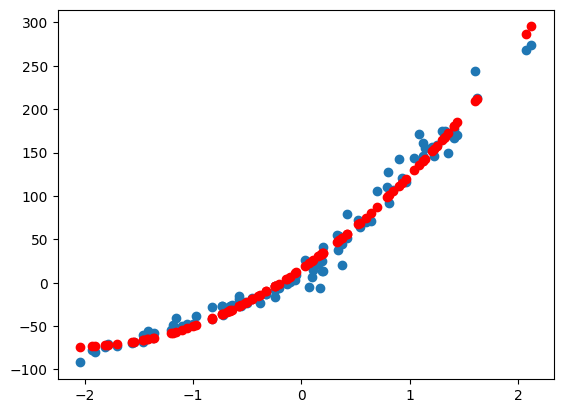

In [20]:
pred = model(X , theta_f)
plt.scatter(x[: , 0] , y)
plt.scatter(x[: , 0] , pred , c = 'r')

In [21]:
#Coefficient de determination(Performance du modèle)
def coeff(y , pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u / v)

In [22]:
coeff(y , pred)

0.9803981438857257